<div style="text-align: center;">
    <h1>Digit Recognition Using PCA</h1>
    </div>
</div>

In this project, we aim to design a digit recognition algorithm based on features obtained using PCA.

### 1. Load the dataset

In [51]:
from sklearn.datasets import fetch_openml
import numpy as np

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)

### 2. Vectorize and Normalize the Images

In [52]:
# The images have been vectorized (flattened) when loading using fetch_openml. Each 28x28 image is represented as a vector of 784 features.

# Extract the images which have 784 features
X = mnist.data
# Convert target labels from strings to integers
y = mnist.target.astype(np.int8)

# Normalize the pixel values to the range [0, 1]
X_normalized = X / 255.0

# There are 70,000 images of handwritten digits, each represented by 784 features (flattened from 28x28 pixels)
print(f"Normalized data shape: {X_normalized.shape}")
# There are 70,000 target labels (i.e. the digit from 0-9)
print(f"Target shape: {y.shape}")

Normalized data shape: (70000, 784)
Target shape: (70000,)


### 3. Compute the PCA of the Dataset

In [53]:
from sklearn.decomposition import PCA

# Center the data by subtracting the mean
X_centered = X_normalized - np.mean(X_normalized, axis=0)

# Compute PCA
pca = PCA()
X_pca = pca.fit_transform(X_centered)

# Principal components and principal values
principal_components = pca.components_
principal_values = pca.explained_variance_

print(f"Principal components shape: {principal_components.shape}")
print(f"Principal values shape: {principal_values.shape}")

Principal components shape: (784, 784)
Principal values shape: (784,)


### 4. Represent Each Point Using the First K Principal Components

In [54]:
# Choose the number of principal components to keep
K = 50

# Project the data onto the first K principal components
X_pca_reduced = X_pca[:, :K]

# Display the shape of the reduced data
reduced_data_shape = X_pca_reduced.shape

reduced_data_shape

(70000, 50)

### 5. Visualize the Principal Components and Reconstructed Images

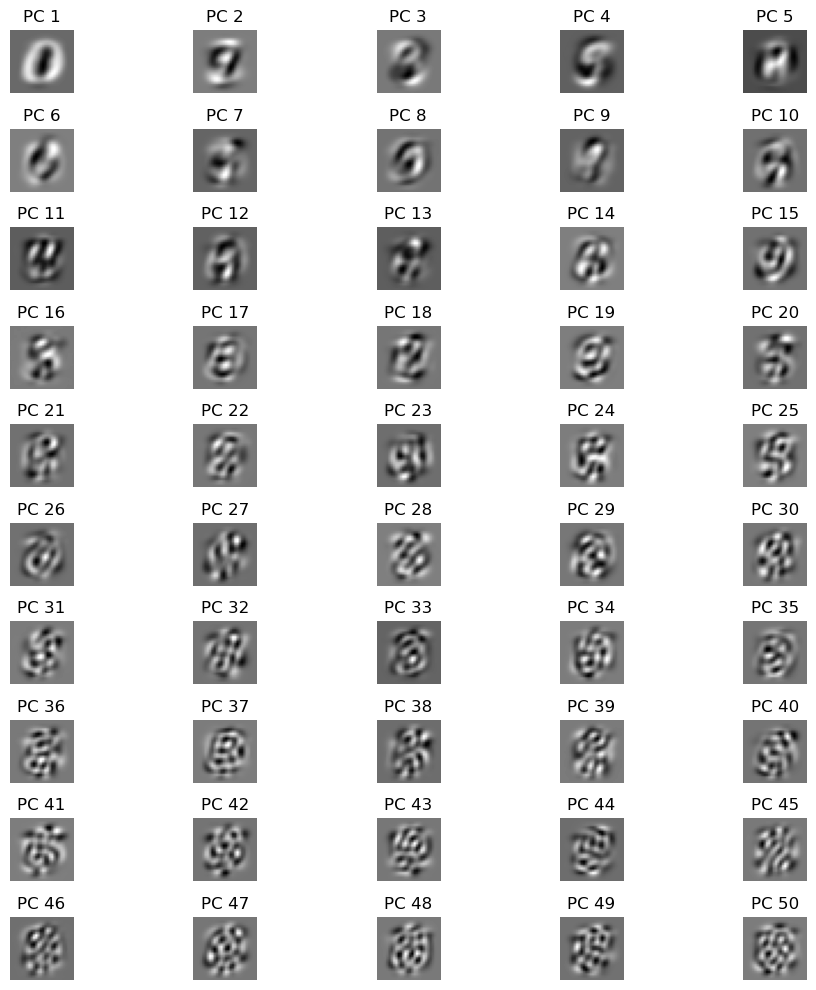

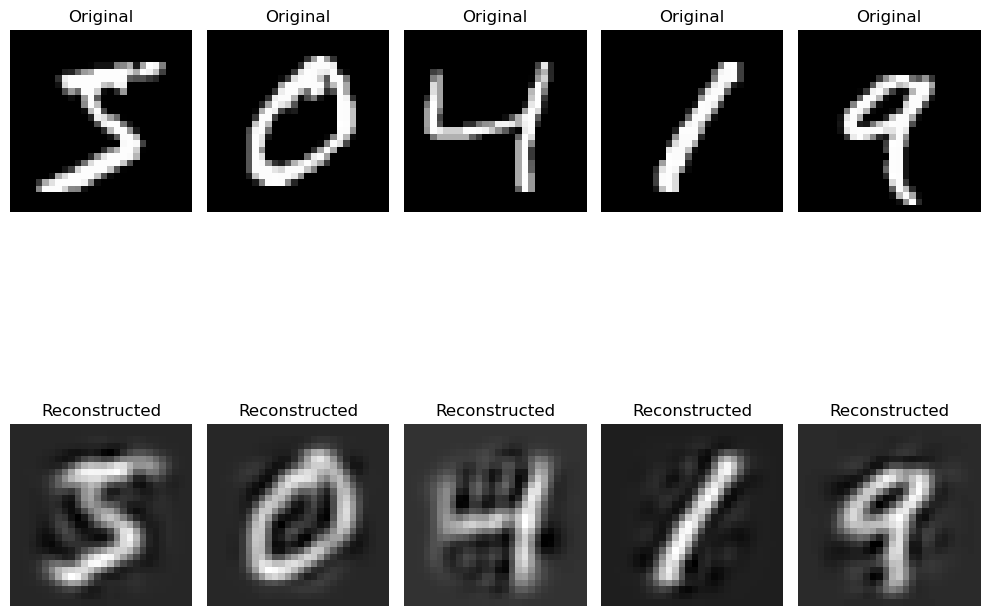

In [59]:
import matplotlib.pyplot as plt

# Function to plot images
def plot_images(images, titles, nrows, ncols):
    fig, axes = plt.subplots(nrows, ncols, figsize=(10, 10))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape(28, 28), cmap='gray')
        ax.set_title(titles[i])
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Visualize the first few principal components
n_components_to_show = 50
principal_components_images = principal_components[:n_components_to_show].reshape((n_components_to_show, 28, 28))

# Adjust the number of rows and columns to display 50 images
nrows = 10
ncols = 5

plot_images(principal_components_images, [f'PC {i+1}' for i in range(n_components_to_show)], nrows, ncols)

# Choose the number of principal components to keep
K = 50

# Compute PCA with K components
pca_k = PCA(n_components=K)
X_pca_reduced = pca_k.fit_transform(X_centered)

# Inverse transform to reconstruct the images
X_reconstructed = pca_k.inverse_transform(X_pca_reduced)

# Add the mean back to the reconstructed images
X_reconstructed += np.mean(X_normalized.to_numpy(), axis=0).reshape(1, -1)

# Plot original and reconstructed images side by side
n_images_to_show = 5
original_images = X_normalized[:n_images_to_show]
reconstructed_images = X_reconstructed[:n_images_to_show]

plot_images(np.vstack((original_images, reconstructed_images)), 
            ['Original']*n_images_to_show + ['Reconstructed']*n_images_to_show, 
            2, n_images_to_show)

As we found the above, we can see that the 50 principal components appear as vague or vlurred versions of digits or parts of digits. Note that principal components are not specific digits but the abstract features capturing the most significant patterns of variation in the dataset. Each principal component is a linear combination of the original pixel values and captures the directions in which the data varies the most. The inverse transform reconstructs the original data from the reduced representation by projecting it back to the high-dimensional space using the principal components and adding back the mean to restore the original scale and location.

By comparing the original images with the reconstructed ones, we observe that the reconstructed images look alike to the original images but are slightly blurred. This blurriness occurs because the reconstruction process only uses a limited number of principal components (e.g., 50), which capture the most significant patterns of variation but may not retain all the fine details present in the original images.

### 6. Train a Classifier Using LDA

In [57]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Perform PCA on the Original Data
K = 50
pca = PCA(n_components=K)
X_pca = pca.fit_transform(X)

# Train LDA Classifier on PCA-Transformed Data
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
lda_pca = LDA()
lda_pca.fit(X_train_pca, y_train)
y_pred_pca = lda_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

# Train LDA Classifier on Original Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lda_original = LDA()
lda_original.fit(X_train, y_train)
y_pred_original = lda_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)

# Evaluate and Compare Performance
print(f"Accuracy of LDA on PCA-transformed data: {accuracy_pca:.4f}")
print(f"Accuracy of LDA on original data: {accuracy_original:.4f}")

Accuracy of LDA on PCA-transformed data: 0.8646
Accuracy of LDA on original data: 0.8677


We used LDA to train a classifier on the PCA-transformed data and on the orginal data set. Based on these results, we found that the accuracy of LDA on the PCA-transformed data with 50 principal components is very close to the accuracy on the original data.

### 7. Summarize the Results

In this assignment, we used PCA to design a digit recognition algorithm based on features. 

We utilized the MNIST dataset, which contains 70,000 images of handwritten digits and each is represented by 784 features (28x28 pixels). We firstly normalized the images to the range from 0 to 1, ensured the data was centered, and computed PCA to obtain the first 50 principal components. We visualized the first few principal components, which showed abstract features capturing significant patterns of variation, and generated reconstructed images. The reconstructed images appeared similar to the original images. Additionally, we also trained LDA classifiers on both the PCA-transformed data and original dataset and found that the performance on original dataset is better.

We chose K=50 to retain more significant patterns of variation while still reducing the dimensionality of the data. This choice was based on the observation that a higher number of components can capture more information, leading to better classification performance. The results confirmed that K=50 was a suitable choice, as the LDA classifier's accuracy on the PCA-transformed data was very close to its accuracy on the original data.

Overall, PCA is an effective method for dimensionality reduction, which helps reduce computational complexity and improve the performance of machine learning algorithms by removing noise and redundant features. In this case, the LDA classifier's performance on the PCA-transformed data with 50 components was very close to its performance on the original data. This suggests that with 50 principal components, most of the important information is retained, leading to comparable classification accuracy.